In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sn
import pandas as pd

In [2]:
np.random.seed(101) 
tf.random.set_seed(101)
np.set_printoptions(precision=3,suppress=True)  

In [3]:
print(tf.__version__)

2.11.0


In [4]:
dataset = "D:/projects/LARGE Projects/steam_game_analysis/steam_game_final.csv"
df = pd.read_csv(dataset)

In [5]:
df

,date_release,win,mac,linux,rating,price_final,steam_deck
0,2008,True,False,False,Very Positive,19.99,True
1,2008,True,False,False,Very Positive,9.99,True
2,2011,True,False,False,Positive,2.99,True
3,2013,True,True,True,Very Positive,14.99,True
4,2014,True,False,False,Mixed,14.99,True
...,...,...,...,...,...,...,...
46063,2018,True,False,False,Very Positive,0.00,True
46064,2018,True,False,False,Very Positive,0.00,True
46065,2021,True,False,False,Mostly Positive,0.00,True
46066,2021,True,False,False,Positive,0.00,True


In [6]:
df.tail()

,date_release,win,mac,linux,rating,price_final,steam_deck
46063,2018,True,False,False,Very Positive,0.0,True
46064,2018,True,False,False,Very Positive,0.0,True
46065,2021,True,False,False,Mostly Positive,0.0,True
46066,2021,True,False,False,Positive,0.0,True
46067,2023,True,False,False,Mixed,0.0,True


In [7]:
df.head()

,date_release,win,mac,linux,rating,price_final,steam_deck
0,2008,True,False,False,Very Positive,19.99,True
1,2008,True,False,False,Very Positive,9.99,True
2,2011,True,False,False,Positive,2.99,True
3,2013,True,True,True,Very Positive,14.99,True
4,2014,True,False,False,Mixed,14.99,True


In [8]:
df.isna().sum()

date_release    0
win             0
mac             0
linux           0
rating          0
price_final     0
steam_deck      0
dtype: int64

In [9]:
df['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Mostly Negative',
       'Overwhelmingly Negative', 'Negative', 'Very Negative'],
      dtype=object)

In [10]:
df.win=df.win.astype('category').cat.codes
df.mac=df.mac.astype('category').cat.codes
df.linux=df.linux.astype('category').cat.codes
df.rating=df.rating.astype('category').cat.codes

df.date_release=df.date_release.astype(np.float32)
df.price_final=df.price_final.astype(np.float32)
df.win = df.win.astype(np.float32)
df.mac = df.mac.astype(np.float32)
df.linux = df.linux.astype(np.float32)
df.rating = df.rating.astype(np.float32)

In [11]:
df

,date_release,win,mac,linux,rating,price_final,steam_deck
0,2008.0,1.0,0.0,0.0,8.0,19.99,True
1,2008.0,1.0,0.0,0.0,8.0,9.99,True
2,2011.0,1.0,0.0,0.0,6.0,2.99,True
3,2013.0,1.0,1.0,1.0,8.0,14.99,True
4,2014.0,1.0,0.0,0.0,0.0,14.99,True
...,...,...,...,...,...,...,...
46063,2018.0,1.0,0.0,0.0,8.0,0.00,True
46064,2018.0,1.0,0.0,0.0,8.0,0.00,True
46065,2021.0,1.0,0.0,0.0,2.0,0.00,True
46066,2021.0,1.0,0.0,0.0,6.0,0.00,True


In [12]:
df.dtypes

date_release    float32
win             float32
mac             float32
linux           float32
rating          float32
price_final     float32
steam_deck         bool
dtype: object

In [13]:
df.drop(['steam_deck'], axis=1)

,date_release,win,mac,linux,rating,price_final
0,2008.0,1.0,0.0,0.0,8.0,19.99
1,2008.0,1.0,0.0,0.0,8.0,9.99
2,2011.0,1.0,0.0,0.0,6.0,2.99
3,2013.0,1.0,1.0,1.0,8.0,14.99
4,2014.0,1.0,0.0,0.0,0.0,14.99
...,...,...,...,...,...,...
46063,2018.0,1.0,0.0,0.0,8.0,0.00
46064,2018.0,1.0,0.0,0.0,8.0,0.00
46065,2021.0,1.0,0.0,0.0,2.0,0.00
46066,2021.0,1.0,0.0,0.0,6.0,0.00


In [14]:
df = df.astype(np.int32)

In [15]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

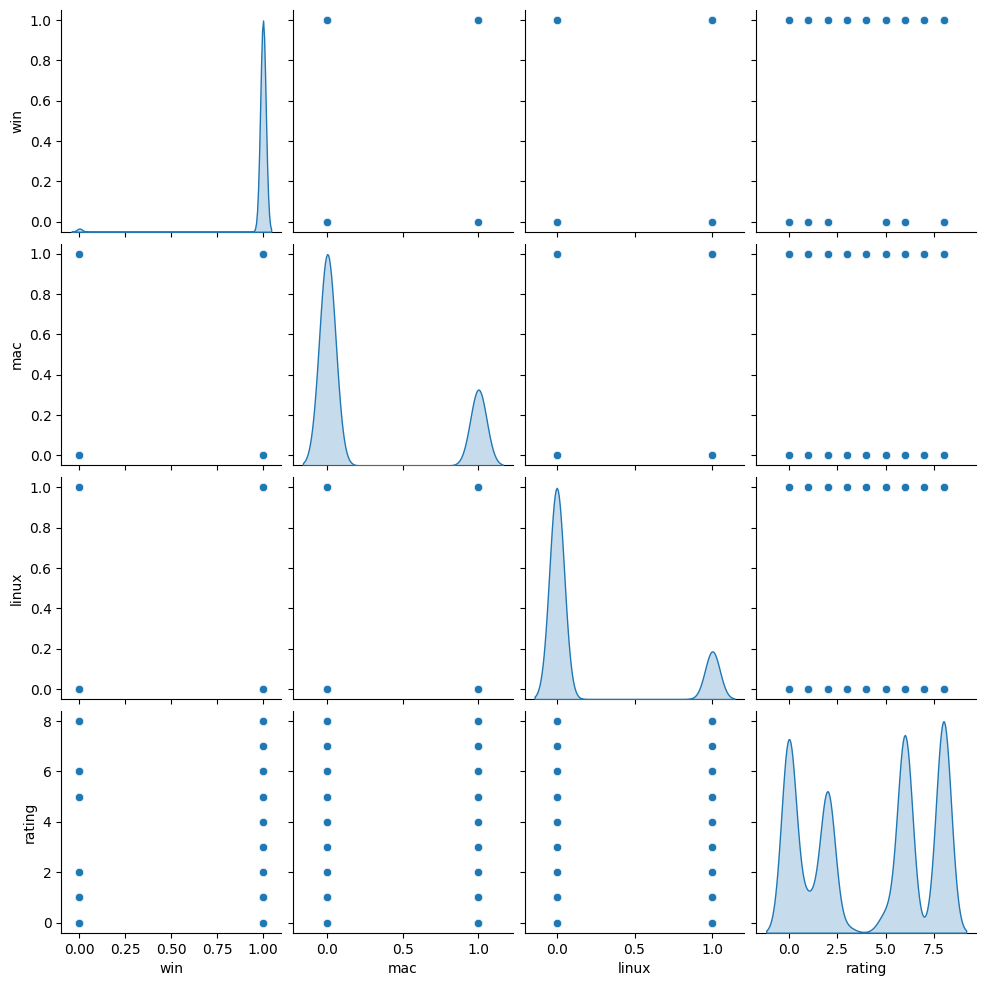

In [16]:
sn.pairplot(train_dataset[['win', 'mac', 'linux', 'rating']], diag_kind='kde')

In [17]:
train_dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
date_release,36854.0,2018.407853,3.020658,1997.0,2017.0,2019.0,2021.0,2023.0
win,36854.0,0.984968,0.121683,0.0,1.0,1.0,1.0,1.0
mac,36854.0,0.264232,0.440929,0.0,0.0,0.0,1.0,1.0
linux,36854.0,0.184349,0.387774,0.0,0.0,0.0,0.0,1.0
rating,36854.0,4.143675,3.191626,0.0,1.0,6.0,8.0,8.0
price_final,36854.0,7.946709,11.314588,0.0,1.0,4.0,11.0,299.0
steam_deck,36854.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [18]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('rating')
test_labels = test_features.pop('rating')

In [19]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
date_release,2018.407853,3.020658
win,0.984968,0.121683
mac,0.264232,0.440929
linux,0.184349,0.387774
rating,4.143675,3.191626
price_final,7.946709,11.314588
steam_deck,1.000000,0.000000


In [20]:
normalizer = tf.keras.layers.Normalization(axis=-1)


In [21]:
train_features = train_features.astype(np.int32)

In [22]:
normalizer.adapt(np.array(train_features))

In [23]:
print(normalizer.mean.numpy())

[[2018.407    0.985    0.264    0.184    7.947    1.   ]]


In [24]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[2019    1    0    0   11    1]]

Normalized: [[ 0.2   0.12 -0.6  -0.48  0.27  0.  ]]


In [25]:

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [26]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 61ms/step


array([[ 0.892],
       [-2.566],
       [ 0.24 ],
       [-2.318],
       [ 0.1  ],
       [ 0.858],
       [-5.752],
       [-0.026],
       [ 2.392],
       [ 2.18 ]], dtype=float32)

In [27]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(6, 1) dtype=float32, numpy=
array([[ 0.8  ],
       [-0.237],
       [-0.925],
       [-0.894],
       [-0.798],
       [-0.527]], dtype=float32)>

In [28]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [29]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 13 s
Wall time: 58.6 s


In [32]:
#regression using deep neural networks

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [33]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                448       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,686
Trainable params: 4,673
Non-trainable params: 13
_________________________________________________________________


In [34]:

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

In [35]:
train_features

,date_release,win,mac,linux,price_final,steam_deck
45625,2019,1,0,0,11,1
39069,2012,1,1,0,4,1
16108,2020,1,0,0,24,1
9078,2017,1,0,0,49,1
33143,2021,1,1,0,0,1
...,...,...,...,...,...,...
22623,2017,1,0,0,0,1
11095,2009,1,1,0,4,1
10092,2020,1,0,0,14,1
26364,2014,1,1,1,0,1


288/288 [==============================] - 0s 613us/step


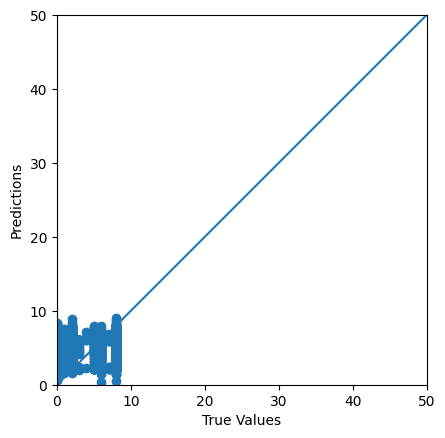

In [40]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

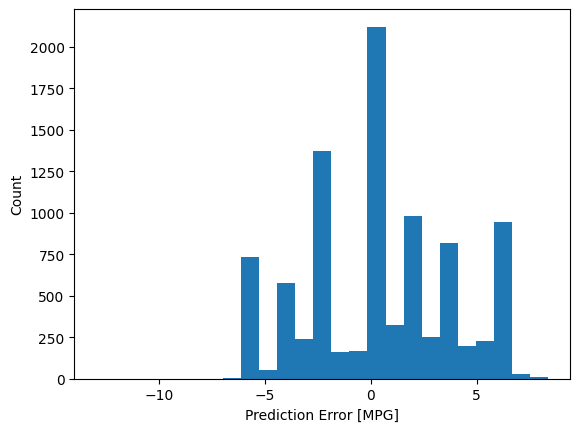

In [41]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [38]:
#save model

dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


INFO:tensorflow:Assets written to: dnn_model\assets


In [39]:
#reload model

reloaded = tf.keras.models.load_model('dnn_model')
